In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

Unsupervised learning does not require labeled data because it focuses on discovering hidden patterns or structures in the data without knowing the correct outputs beforehand.

In [5]:
X = df.drop(columns=['Species','Id'])#dropping the species and id columns to have the remaining as features.
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
X.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0.5, 1.0, 'Measurements: Sepal length against Sepal Width')

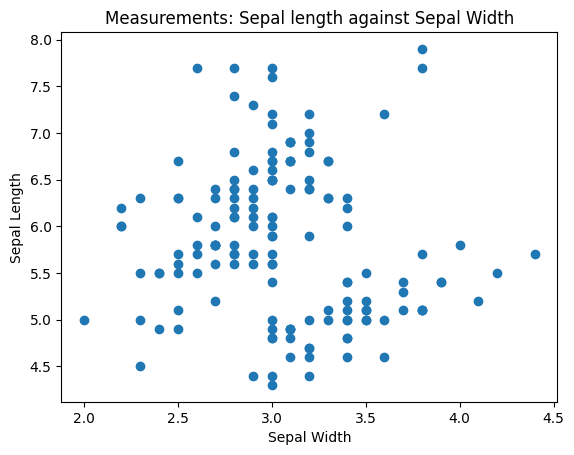

In [7]:
#Scatter plot visualization of Sepal length vs Sepal Width
plt.scatter(X['SepalWidthCm'],X['SepalLengthCm'])
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.title('Measurements: Sepal length against Sepal Width')

Text(0.5, 1.0, 'Measurements: Petal length against Petal Width')

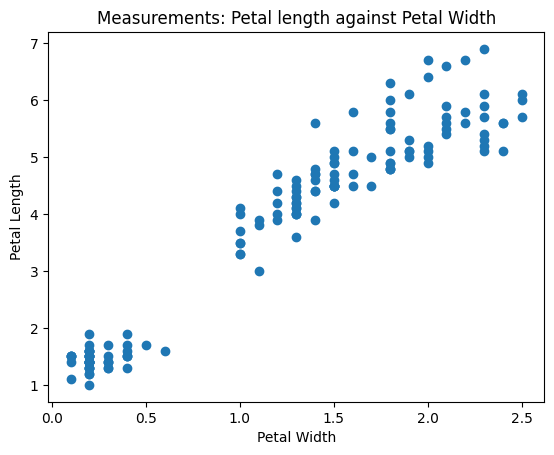

In [8]:
#Scatter plot visualization of Petal length vs Petal Width
plt.scatter(X['PetalWidthCm'], X['PetalLengthCm'])
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Measurements: Petal length against Petal Width')


In [ ]:
#The Petal Length vs Petal Width feature pair shows the most distinct natural groupings, 
#with clearer separation between clusters compared to Sepal Length vs Sepal Width.

Feature scaling and its importance:

In [9]:
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_scaled_df = pd.DataFrame(X_scaled ,columns=X.columns)
#Comparing original to scaled data
X.head() , X_scaled_df.head()

(   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 0            5.1           3.5            1.4           0.2
 1            4.9           3.0            1.4           0.2
 2            4.7           3.2            1.3           0.2
 3            4.6           3.1            1.5           0.2
 4            5.0           3.6            1.4           0.2,
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 0      -0.900681      1.032057      -1.341272     -1.312977
 1      -1.143017     -0.124958      -1.341272     -1.312977
 2      -1.385353      0.337848      -1.398138     -1.312977
 3      -1.506521      0.106445      -1.284407     -1.312977
 4      -1.021849      1.263460      -1.341272     -1.312977)

Feature scaling is important for K-Means because it relies on distance calculations, and features with larger scales can dominate the clustering process.

Training the data on KMeans model

In [11]:
model = KMeans(n_clusters=3, random_state=42)
trained = model.fit_predict(X_scaled)

In [12]:
X['cluster'] = trained
X.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,2
9,4.9,3.1,1.5,0.1,2


In [13]:
centroids = model.cluster_centers_
centroids

array([[ 0.57100359, -0.36600236,  0.69108416,  0.66322635],
       [-0.80601877,  1.33577362, -1.28618375, -1.21026347],
       [-1.31926109, -0.34584225, -1.14482725, -1.1336954 ]])

Text(0.5, 1.0, 'K-Means Clusters')

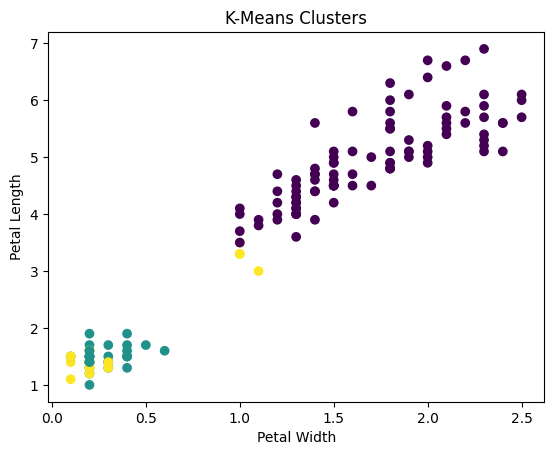

In [14]:
plt.scatter(
    X['PetalWidthCm'],
    X['PetalLengthCm'],
    c = X['cluster']
)
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('K-Means Clusters')

In [15]:
centroids.shape

(3, 4)

In [16]:
#converting the centroids back to cm instead of scaled data for visualization
original_centroids = scaler.inverse_transform(centroids)
original_centroids

array([[6.31458333, 2.89583333, 4.97395833, 1.703125  ],
       [5.178125  , 3.63125   , 1.496875  , 0.278125  ],
       [4.75454545, 2.90454545, 1.74545455, 0.33636364]])

In [17]:
#changing to a dataframe
centroids_df =pd.DataFrame(original_centroids,columns = X.drop(columns='cluster').columns)
centroids_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,6.314583,2.895833,4.973958,1.703125
1,5.178125,3.631250,1.496875,0.278125
2,4.754545,2.904545,1.745455,0.336364


Text(0.5, 1.0, 'K-Means Clusters')

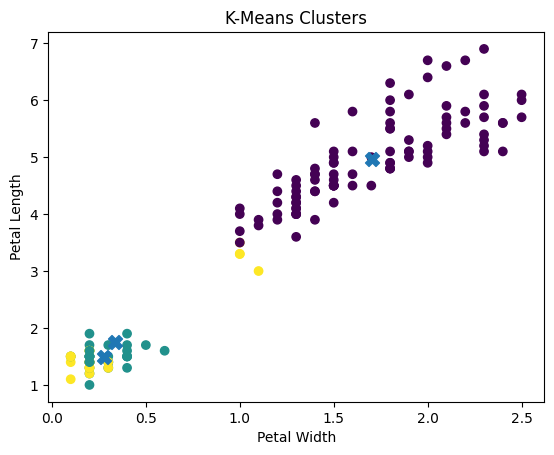

In [18]:
#Marking the cluster centroids with'X'
plt.scatter(
    X['PetalWidthCm'],
    X['PetalLengthCm'],
    c = X['cluster']
)
plt.scatter(
    centroids_df['PetalWidthCm'],
    centroids_df['PetalLengthCm'],
    marker='X',
    s =100
)
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('K-Means Clusters')

The clusters appear clearly separated, especially when using petal features, indicating effective grouping by K-Means.

In [19]:
n_clusters= range(1,11)
wcss = []
for k in n_clusters:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled_df)
    wcss.append(model.inertia_)

wcss

[600.0,
 223.73200573676345,
 192.03717409190028,
 114.68221609937966,
 91.29544474066982,
 81.7602613286062,
 80.98238131032987,
 68.08623905064634,
 59.38528882045365,
 52.989997210158606]

Text(0.5, 1.0, 'Elbow Method')

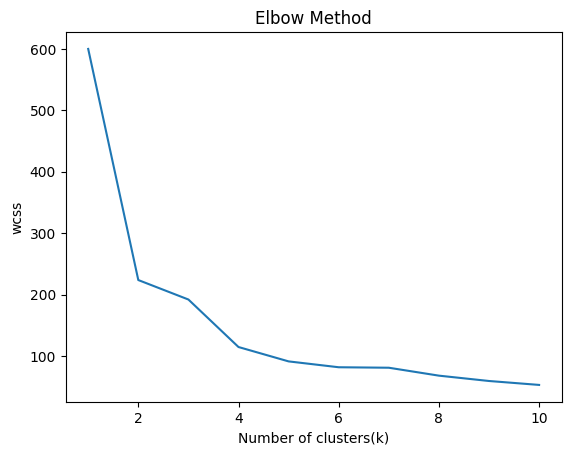

In [20]:
plt.plot(n_clusters ,wcss)
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss')
plt.title('Elbow Method')

The elbow method is a good choice  for the number of clusters because creates a balance between maximizing clusters and minimizing complexity

Interpretation and Reflection:  
-Some of the patterns the clustering algorithm discover:  
    There were natural groupings mainly defined by the petal size data  
-How many clusters seem reasonable based on the plots:  
    Three clusters seem reasonable based on both the scatter plots and the elbow method.  
-challenges notice when clustering the data:  
    some clusters slightly overlap, showing that real-world data is not always perfectly separable  